In [13]:
import pandas as pd
import numpy as np
import csv

In [4]:
df = pd.read_csv("SURFnet_memory_decoherece_timev2.csv")

In [30]:

each_scheme_result_file_path = [

    "SURFnet_memory_decoherece_timev2.csv",

        ]

L = 100
counter = 0
repeater_lengths = [6,7,8,9,10]

    
M_values = [1000]
D_values= [100,200,50,10]
R_values = [2,5,10,20]
num_of_user_pairs_values = [1]

unique_run_numbers = set([])
each_repeater_chain_length_rate_required_W = {}
selected_genetic_alg_steps = []
rl_algorithm_epochs = []
repeater_placement_values = []
scheme_keys = []
egr_values2 = []
tested_work_loads = []
selected_epochs_for_genetic = []
checked_topologies = []
min_rate_values = []
W_values = []
Metro_Area_link_lenght_values = []
processing_time_values = []
each_scheme_memory_utility = {}
L_values = []
end_nodes_life_time_values = []
repeaters_life_time_values = []
for result_file_path in each_scheme_result_file_path:
    with open(result_file_path, "r") as f:
        reader = csv.reader( (line.replace('\0','') for line in f) )
        for line in reader:
            round_number = int(line[0])
            unique_run_numbers.add(round_number)
            num_of_user_pairs = int(line[2])
            K = int(line[6])
            D = int(line[7])
            end_user_M = int(line[9])
            R =int(line[10])
            utility = float(line[11])
            repeaters_life_time = int(line[32])/1000
            end_node_memory_lifetime = int(line[33])/1000

            if  (num_of_user_pairs in [4] and 
           end_user_M in [100] and K in [1] and D in [100]
                     and L ==100 and R in [10] and repeaters_life_time<=1.4 and 
                end_node_memory_lifetime <5.0):
                        if utility==-100:
                            utility = -50  
#                         if scheme_title not in scheme_keys:
#                             scheme_keys.append(scheme_title)
                        try:
                            each_scheme_memory_utility[repeaters_life_time,end_node_memory_lifetime].append(utility)
                        except:
                            each_scheme_memory_utility[repeaters_life_time,end_node_memory_lifetime] = [utility]
                                
                        if repeaters_life_time not in repeaters_life_time_values:
                            repeaters_life_time_values.append(repeaters_life_time)
                        if end_node_memory_lifetime not in end_nodes_life_time_values:
                            end_nodes_life_time_values.append(end_node_memory_lifetime)

X = []
Y =[]
Z = []
rate_or_utility_values = []
repeaters_life_time_values.sort()
end_nodes_life_time_values.sort()
print("repeaters_life_time_values ",repeaters_life_time_values)
print("end_nodes_life_time_values",end_nodes_life_time_values)
# print("each_scheme_memory_utility ",each_scheme_memory_utility)
for end_node_LT in end_nodes_life_time_values:
    for rep_LT in repeaters_life_time_values:
        if (rep_LT,end_node_LT) in each_scheme_memory_utility:
            utilities = each_scheme_memory_utility[rep_LT,end_node_LT]
            avg_utility = sum(utilities)/len(utilities)
            X.append(end_node_LT)
            Y.append(rep_LT)
            Z.append(avg_utility)


# plotting_2D("E_M_t","R_M_t","Utility",40,
#                           12, 12, 12,
#                           12, 0, 0,
#                           0,0,
#                           100,
#                           X,Y,Z,-50,-18,-4,
#                           False,True,
#                           False,1,
#                           14,"plots/2D_memory_life_time.pdf",
#                           False,3,6,3.6)

X,Y, Z = np.array(X),np.array(Y),np.array(Z)

# X = np.reshape(X, (26, 40))
# Y = np.reshape(Y, (26, 40))
# Z = np.reshape(Z, (26, 40))


repeaters_life_time_values  [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.05, 1.1, 1.15, 1.2, 1.25, 1.3, 1.35]
end_nodes_life_time_values [3.0, 3.05, 3.1, 3.15, 3.2, 3.25, 3.3, 3.35, 3.4, 3.45, 3.5, 3.55, 3.6, 3.65, 3.7, 3.75, 3.8, 3.85, 3.9, 3.95, 4.0, 4.05, 4.1, 4.15, 4.2, 4.25, 4.3, 4.35, 4.4, 4.45, 4.5, 4.55, 4.6, 4.65, 4.7, 4.75, 4.8, 4.85, 4.9, 4.95]


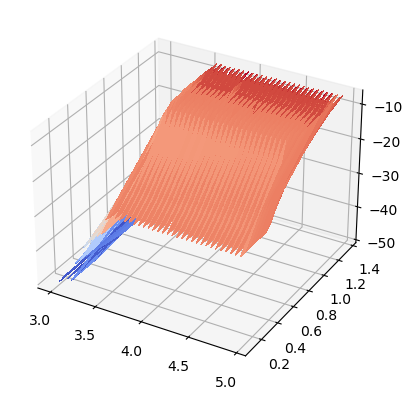

In [29]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# X_p, Y_p = np.meshgrid(X, Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


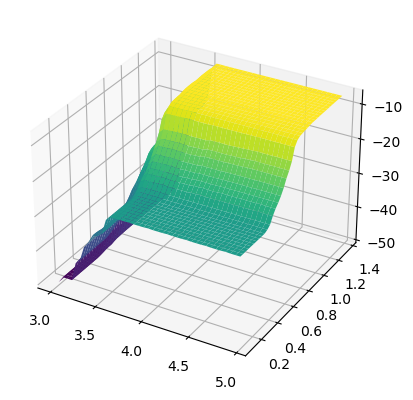

In [36]:
import scipy.interpolate as interp

plotx,ploty, = np.meshgrid(np.linspace(np.min(X),np.max(X),40),\
                           np.linspace(np.min(Y),np.max(Y),40))
plotz = interp.griddata((X,Y),Z,(plotx,ploty),method='linear')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(plotx,ploty,plotz,cstride=1,rstride=1,cmap='viridis')  # or 'hot'

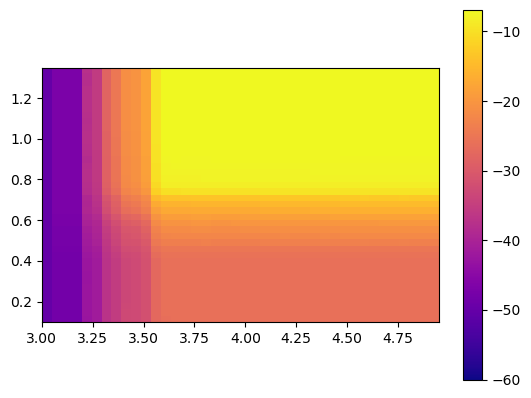

In [48]:
fig, ax = plt.subplots()
im = ax.imshow(plotz, interpolation='none', cmap=cm.plasma,
               origin='lower', extent=[np.min(X),np.max(X), np.min(Y),np.max(Y)],
               vmax=(Z).max(), vmin=-60)

fig.colorbar(im)
